In [17]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import os
import numpy as np

In [8]:
os.getcwd()

'/Users/heosangbeom/Desktop/dacon'

In [10]:
os.chdir("./[데이콘 Basic] 따릉이 대여량_211103")

In [12]:
train = pd.read_csv("train.csv")

In [34]:
train = pd.DataFrame(train)

In [35]:
train.set_index("date_time")

,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,number_of_rentals
date_time,,,,,,,,,
2018-04-01,207.500,4.000,0.000,3.050,75.000,12.600,21.000,30.000,22994
2018-04-02,208.317,2.950,0.000,3.278,69.833,12.812,19.000,19.500,28139
2018-04-03,213.516,2.911,0.000,2.690,74.879,10.312,15.316,19.113,26817
2018-04-04,143.836,3.692,0.425,3.138,71.849,8.312,12.368,43.493,26034
2018-04-05,95.905,4.000,0.723,3.186,73.784,5.875,10.421,63.378,2833
...,...,...,...,...,...,...,...,...,...
2020-06-26,228.662,3.980,0.223,2.271,78.378,20.500,27.526,36.486,96150
2020-06-27,207.770,2.865,0.081,1.794,78.412,20.812,28.842,21.081,107001
2020-06-28,282.568,1.730,0.000,1.820,72.736,21.000,29.053,7.297,98568


### Heuristic하게 의미있는 Feature 발라내거나 추가하기

* 따릉이 대여량과 관련있는 변수가 뭘까? 

$y={\beta_{0}}+{\sum_{i}^{n}}{\beta_{i}}x_{i}+{\epsilon}\,\,\,(where\, i=[1, len(train.columns)])$

즉, 위 회귀식에서 $x_{i}$에 포함되어야 할 피쳐는 무엇일까?

### bicycle_train.csv : 학습 데이터
- date_time : 일별 날짜
- wind_direction: 풍향 (degree)
- sky_condition : 하늘 상태 (하단 설명 참조)
- precipitation_form : 강수 형태 (하단 설명 참조)
- wind_speed : 풍속 (m/s)
- humidity : 습도 (%)
- low_temp : 최저 기온 ( `C)
- high_temp : 최고 기온 ( `C)
- Precipitation_Probability : 강수 확률 (%)
- number_of_rentals : 따릉이 대여량

In [28]:
print(f"데이터 피쳐의 개수는 총 {len(train.columns)}개 입니다\n")

for i in train.columns:
    print(i)

데이터 피쳐의 개수는 총 10개 입니다

date_time
wind_direction
sky_condition
precipitation_form
wind_speed
humidity
low_temp
high_temp
Precipitation_Probability
number_of_rentals


In [37]:
train["avg temp"] = (train["high_temp"] + train["low_temp"])/2

array([[<AxesSubplot:title={'center':'precipitation_form'}>,
        <AxesSubplot:title={'center':'number_of_rentals'}>]], dtype=object)

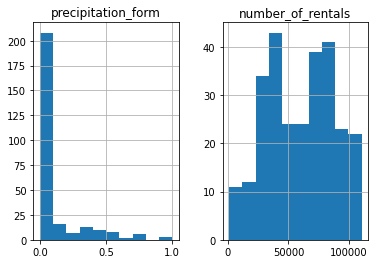

In [43]:
train[["precipitation_form", "number_of_rentals"]].hist()

In [82]:
corr = (train.corr)
corr

<bound method DataFrame.corr of       date_time  wind_direction  sky_condition  precipitation_form  \
0    2018-04-01         207.500          4.000               0.000   
1    2018-04-02         208.317          2.950               0.000   
2    2018-04-03         213.516          2.911               0.000   
3    2018-04-04         143.836          3.692               0.425   
4    2018-04-05          95.905          4.000               0.723   
..          ...             ...            ...                 ...   
268  2020-06-26         228.662          3.980               0.223   
269  2020-06-27         207.770          2.865               0.081   
270  2020-06-28         282.568          1.730               0.000   
271  2020-06-29         137.027          2.257               0.088   
272  2020-06-30         120.797          3.622               0.432   

     wind_speed  humidity  low_temp  high_temp  Precipitation_Probability  \
0         3.050    75.000    12.600     21.000    

In [64]:
df = pd.pivot_table(train, index="precipitation_form", values="number_of_rentals")

### Sample Scatter Plot (x=강수 확률, y=대여수) 

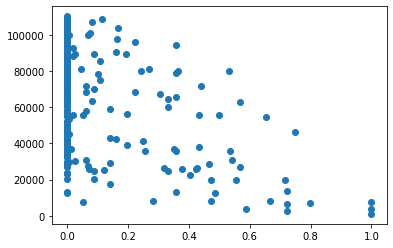

In [86]:
df2 = df.sort_values(by="number_of_rentals", ascending=False)
plt.pyplot.scatter(train["precipitation_form"], train["number_of_rentals"])

아하, 강수 확률과 대여수는 다소 반비례하는 경향이 있구나 ! 그렇다면 대여수와 높은 상관성을 보이는 피쳐를 찾아보자

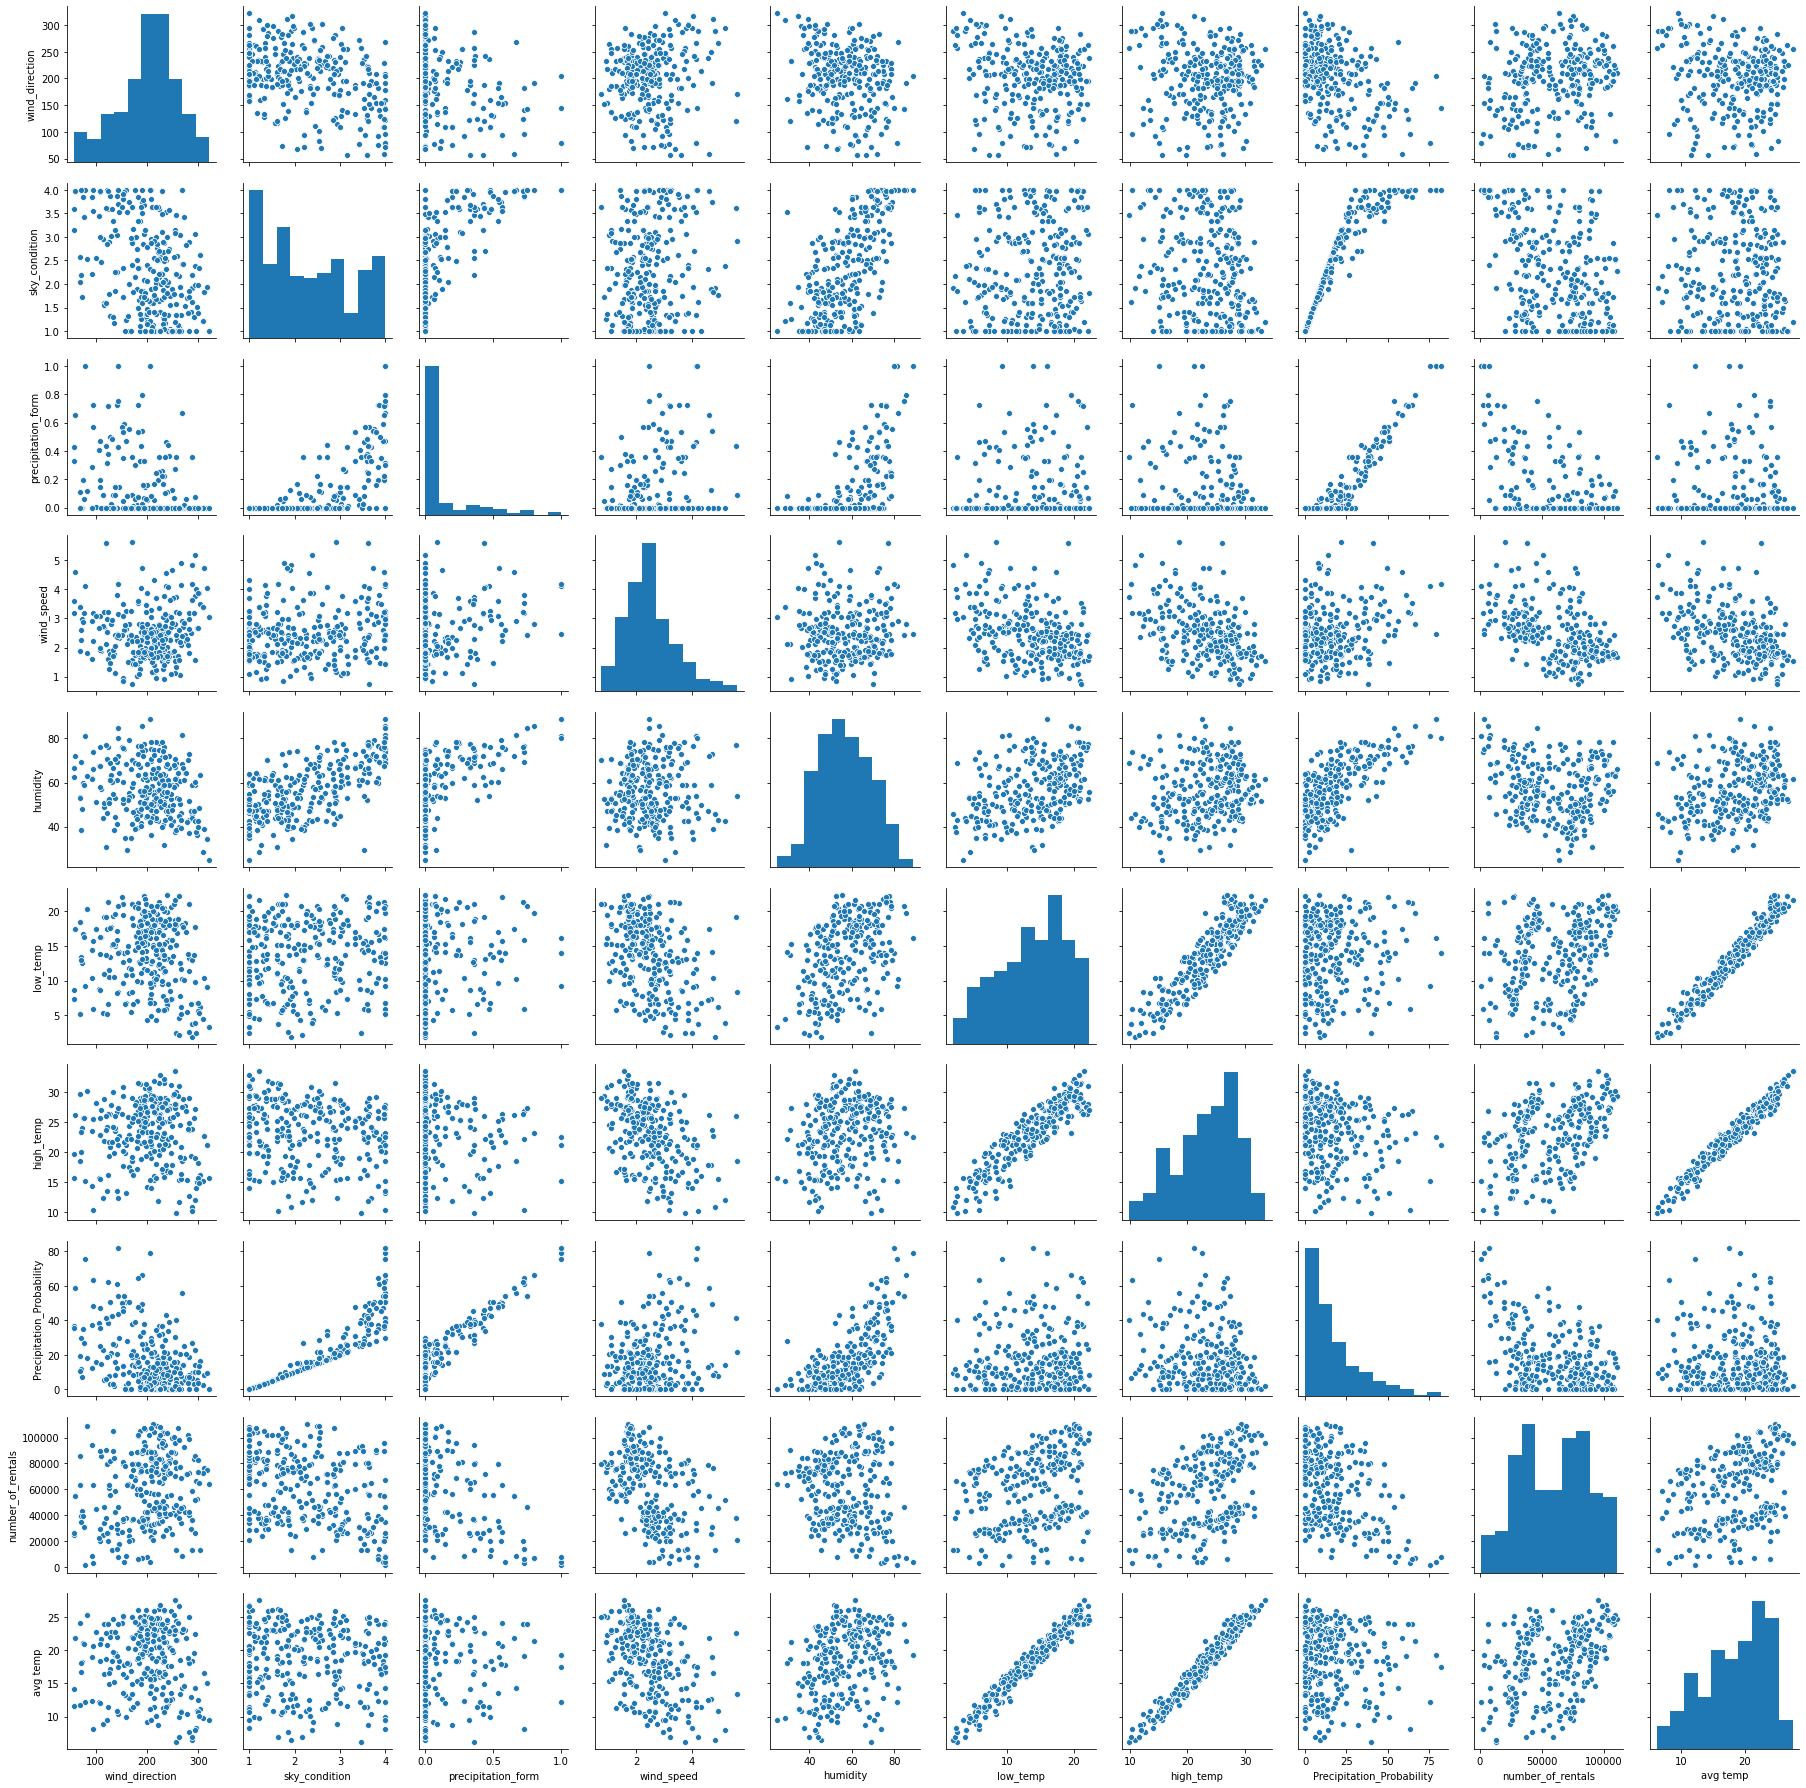

In [85]:
corr = sns.pairplot(train)
corr

아하, number_of_rentals 컬럼을 기준으로 살펴보니 그나마 가장 관계가 높은 피쳐는 "온도" 관련 피쳐들(high_temp, low_temp)이구나 ! 

그렇다면 평균 온도를 파생변수로 새롭게 정의해서 학습에 사용해보자.

* 파생변수로 정의할 평균 온도($temp_{avg}$) $= (temp_{high}+temp_{low})/2$

In [37]:
train["avg temp"] = (train["high_temp"] + train["low_temp"])/2


위 $temp_{avg}$ 변수(확률변수)를 독립변수 $x$로 보고, 해당 벡터 내의 데이터를 가지고 단순회귀분석을 돌려보자 ! 그렇다면 식은 아래와 같이 될 것

#### Simple Linear Regression towards Number of Rentals
* $y_{i} = {\beta}_{0}+{\beta}_{0}x_{i}$

In [104]:
# Regression 시작
## https://yjinheon.github.io/2021/06/08/ML-simple-regression/
import numpy as np
x, y = train["avg temp"], train["number_of_rentals"]

0      16.8000
1      15.9060
2      12.8140
3      10.3400
4       8.1480
        ...   
268    24.0130
269    24.8270
270    25.0265
271    22.8125
272    22.5890
Name: avg temp, Length: 273, dtype: float64

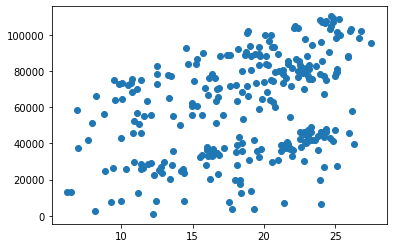

In [98]:
import matplotlib.pyplot as plt
plt.scatter(x, y)

In [100]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [101]:
baseline = y.mean()
errors = y - baseline
mae = errors.abs().mean()

In [108]:
model.fit(x.values.reshape(-1,1), y)

LinearRegression()

In [112]:
print(f"회귀식의 기울기는 {model.coef_}입니다.")
print(f"회귀식의 절편(beta_0)는 {model.intercept_}입니다.")

회귀식의 기울기는 [2072.10191285]입니다.
회귀식의 절편(beta_0)는 21054.622437378785입니다.


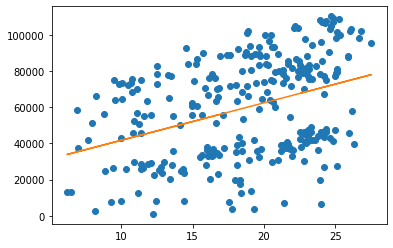

In [114]:
plt.plot(x, y, 'o')
plt.plot(x,model.predict(x.values.reshape(-1,1)))
plt.show()

### 추정 회귀식 (Fitted Line)

* ${\beta}_{1}$ : 회귀식의 기울기는 [2072.10191285]입니다.
* ${\beta}_{0}$ : 회귀식의 절편(beta_0)는 21054.622437378785입니다.

$s.t.\,\, y_{i} = 2072x_{i} + 21055$

In [128]:
test = pd.read_csv("test.csv")

In [127]:
test_avrg_temp = (test["high_temp"]+test["low_temp"])/2
x = test_avrg_temp
x.head().sort_values(ascending=False)

0    16.2335
1    15.5000
4    12.9360
2    12.6215
3    11.8090
dtype: float64

In [130]:
test_yhat = 2072*x+21055

# submission dataFrame 완성
submission = pd.read_csv("sample_submission.csv")
submission['number_of_rentals'] = test_yhat

# 제출 파일 생성
submission.to_csv('sample_submission.csv', index= False)

<AxesSubplot:>

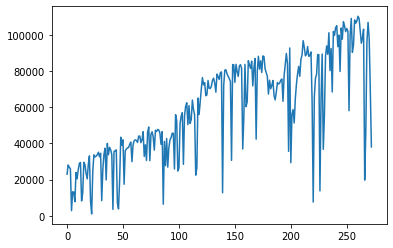

In [137]:
train["number_of_rentals"].plot()

In [141]:
# 시행착오법 시작 ㅋㅋㅋ : test_yhat에 보정계수 0.5 곱하기 => 오차 0.92301 
submission["number_of_rentals"] = test_yhat*0.5

In [145]:
# 시행착오법 2 : test_yhat에 보정계수 0.1 곱하기 => 오차 0.9430658639
submission["number_of_rentals"] = test_yhat*0.1

In [146]:
submission.to_csv('sample_submission.csv', index= False)

<AxesSubplot:>

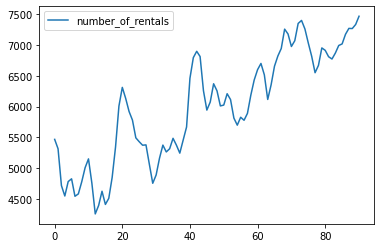

In [147]:
submission.plot()